In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy.linalg as lin

In [2]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
import numpy.linalg as lin

# y= 2x + 1 만들기

In [3]:
w = (3-61)/(1-30)
b= 3 -w *1
print('w,b :', w,b)

x_ = 7
h = w * x_ +b
print('h:', h)

w,b : 2.0 1.0
h: 15.0


# numpy를 이용하여 만들어보기.

In [4]:
x_ = np.array([1,2,3,4,5])

h = w * x_ + b 
 
print(h)

[ 3.  5.  7.  9. 11.]


# 우리가 생각했던 가설의 오차를 구해보자!

In [5]:
w = 2
b = 1  # h = 2x+1

x = np.array([1,2,3,   4,    5,    6,  7])
y = np.array([3,5,7.3, 9.4, 12, 13.7, 16])

h = w*x +b
print('h:',h)

h: [ 3  5  7  9 11 13 15]


In [6]:
print('abs(h-y):',np.abs(h-y)) 
# 오차는 '직선'과의 거리 차이다!!!!! 꼭 오차는 절댓값을 붙여 넣어줘어야 한다.

abs(h-y): [0.  0.  0.3 0.4 1.  0.7 1. ]


In [7]:
np.sum(np.abs(h-y)) # 전체 오차의 합은 3.3999가 나온다
print('np.sum(np.abs(h-y)):',np.sum(np.abs(h-y)))

np.sum(np.abs(h-y)): 3.3999999999999995


# w =2 가 아니라 w = 3일때의 오차를 구해볼까?

In [8]:
w = 3
b = 1 
        # h = 3x + 1

x = np.array([1,2,3,    4,    5,    6, 7 ])
y = np.array([3,5,7.3,  9.4, 12, 13.7, 16])

h = w * x + b

print('np.abs(h-y):',np.abs(h-y))
print('np.sum(np.abs(h-y)):', np.sum(np.abs(h-y)))
# w = 3 일때는, 오차의 합이 24.6이다..  w= 2일떄보다 나쁘네!!

np.abs(h-y): [1.  2.  2.7 3.6 4.  5.3 6. ]
np.sum(np.abs(h-y)): 24.6


# 역행렬을 배워봅시다 start!

In [9]:
A = np.array([[1,1],[2,1]])  #2X2 행렬

y = np.array([[2],[4.4]])   #2X1 행렬

W = np.matmul(lin.inv(A),y)    #lin.inv(A) == A의 역행렬 
# W == A의 역행렬과 y를 곱하여라.

print('W:',W)  # 2X1행렬
print('W[0]:',W[0])
print('W[1]:',W[1])
# A * W = y

print('A.shape:',A.shape)
print('y.shape:',y.shape)
print('W.shape:',W.shape)


W: [[ 2.4]
 [-0.4]]
W[0]: [2.4]
W[1]: [-0.4]
A.shape: (2, 2)
y.shape: (2, 1)
W.shape: (2, 1)


# pinv = (A' x A ) -1   x  A'     , A.T  

In [10]:
A = np.array([[1,1],[2,1],[3,1],[4,1]])
y = np.array([[2],[4.4],[6.4],[9.8]])

# pinv = (A' x A) -1 x A' , A.T         => A.T = A'    A.trace라는 뜻

#첫번째 할 것
np.matmul(A.T, A)  # A' x A

array([[30, 10],
       [10,  4]])

In [11]:
#두번째 할 것
A_ = lin.inv(np.matmul(A.T, A))   # A' x A  의 역행렬

print(np.matmul(A_,A.T))  # (A' x A  의 역행렬) x A' = A+

#세번째 할 것
# A+ x y = (w,
#           b) 가 나온다.

[[-0.3 -0.1  0.1  0.3]
 [ 1.   0.5  0.  -0.5]]


In [12]:
A = np.array([[1,1],[2,1],[3,1],[4,1]])
y = np.array([[2],[4.4],[6.4],[9.8]])

A_ = lin.inv(np.matmul(A.T,A))
W = np.matmul(np.matmul(A_, A.T),y)   # 궁극적으로 목표는 'W'를 구하는 것

print('W:',W)

h = np.matmul(A,W) 
# A x W 을 한다. => '예측'은 W와 A를 곱한 것을 의미한다.


# '원래 값_실제데이터(y)'와 '예측 값_모델데이터(h)'를 비교해보세요^^
print('y:',y)
print('h:',h)

print('np.abs(h-y):',np.abs(h-y))
print('np.sum(np.abs(h-y)):', np.sum(np.abs(h-y)))

W: [[ 2.54]
 [-0.7 ]]
y: [[2. ]
 [4.4]
 [6.4]
 [9.8]]
h: [[1.84]
 [4.38]
 [6.92]
 [9.46]]
np.abs(h-y): [[0.16]
 [0.02]
 [0.52]
 [0.34]]
np.sum(np.abs(h-y)): 1.0400000000000085


## RMSE 구하기 => RMSE  구하는 과정을 '평가'라고 한다.

In [13]:
RMSE = np.sqrt(np.mean((y-h)**2)) # RMSE = 평균제곱근 오차
print('RMSE:',RMSE)
#실제데이터(y)와 모델데이터(h)는 평균 오차가 0.3209 정도라는 뜻

RMSE: 0.3209361307176245


## 공부시간과 SAT 점수 _ 연습문제

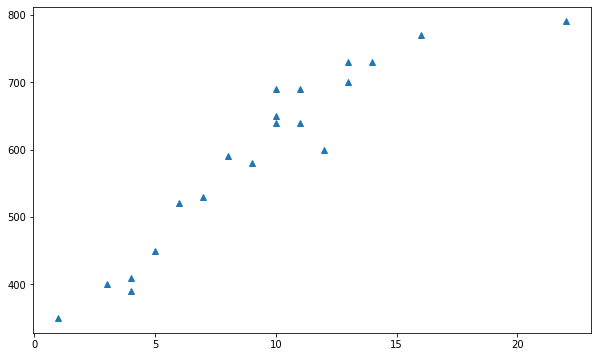

In [14]:
import matplotlib.pyplot as plt

x = np.array([4,9,10,14,4,7,12,22,1,3,8,11,5,6,10,11,16,13,13,10]) 
y = np.array([390,580,650,730,410,530,600,790,350,400,590,640,450,520,690,690,770,700,730,640])
# x는 공부한 시간 / y는 SAT점수
#plt.plot(x,y, '*')
plt.plot(x,y, '^')

## 1. 13, 15 20 시간 공부하면 SAT는 몇점인지 예측

In [15]:
# 임의적으로 w와 b 값을 잡음
# w 값이 클수록 강한 상관관계를 갖고 있음을 확인할 수 있다.
# y= wx + b    => 1차원 직선 관계임! '점수'와 '공부시간' 두 사이의 상관관계 이므로

w = 20.3
b = 351.2
x = [13, 15, 20] # 13, 15, 20 시간 공부하면
y = w * np.array(x) + b
print('y:',y) # 615.1,  655.7, 757.2 점수가 각각 나온다.

y: [615.1 655.7 757.2]


## 2.SAT를 840 점을 얻기 위해 몇 시간 공부해야 하는지

In [16]:
y = 840
x = (y-b)/w
print('x:',x)
print('y:',y)
# 24.0788 시간 공부해야 840점을 맞을 수 있다.

x: 24.078817733990146
y: 840


## 3. 추정 w,b 로 부터 발생하는 학습 오차는 얼마인가?

In [17]:
x = np.array([4,9,10,14,4,7,12,22,1,3,8,11,5,6,10,11,16,13,13,10]) 
y = np.array([390,580,650,730,410,530,600,790,350,400,590,640,450,520,690,690,770,700,730,640])
w = 20.3
b = 351.2   # 3번은 w와 b의 값을 임의로 준 것이다. 최적값이 아니란 말!

error = (y-(w*x+b))**2 # 실제데이터 :y   / 예측데이터 : w*x+b
result = np.sqrt(np.mean(error))

print('학습오차:',result)

학습오차: 72.56996968443626


## 4. 최적의 가중치 w,b 는 얼마인가?

In [18]:
x = np.array([4,9,10,14,4,7,12,22,1,3,8,11,5,6,10,11,16,13,13,10]) 
y = np.array([390,580,650,730,410,530,600,790,350,400,590,640,450,520,690,690,770,700,730,640])
print('x.shape:',x.shape)
print('y.shape:',y.shape)

x.shape: (20,)
y.shape: (20,)


In [19]:
# step1. x와 y의 형태를 [] 와 .T를 통해서 바꾸어 준다.
x = np.array([[4,9,10,14,4,7,12,22,1,3,8,11,5,6,10,11,16,13,13,10]]).T
y = np.array([[390,580,650,730,410,530,600,790,350,400,590,640,450,520,690,690,770,700,730,640]]).T
print('x.shape:',x.shape)
print('y.shape:',y.shape)

x.shape: (20, 1)
y.shape: (20, 1)


In [20]:
# step2.
A = np.append(x, np.ones((x.shape[0],1)),axis = 1)
# append 에 axis = 0 해버리면 1(20개의)이라는게 밑으로 붙어져 버려서 40X1이 되어버리는데
# append 에 axis = 1 해버리면 옆으로 붙어서 20X2가 된다. 1(20개의)이 옆으로 붙어버려서!

print('A.shape:',A.shape) # (20,2) => 20X2 행렬이 된다.
print('A:',A)

W = np.matmul(lin.pinv(A),y)
print('W:',W)  # 최적의 값으로 w = 25.3265 , y절편 = 353.1649 나온다. (정교함)

A.shape: (20, 2)
A: [[ 4.  1.]
 [ 9.  1.]
 [10.  1.]
 [14.  1.]
 [ 4.  1.]
 [ 7.  1.]
 [12.  1.]
 [22.  1.]
 [ 1.  1.]
 [ 3.  1.]
 [ 8.  1.]
 [11.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [10.  1.]
 [11.  1.]
 [16.  1.]
 [13.  1.]
 [13.  1.]
 [10.  1.]]
W: [[ 25.3265]
 [353.1649]]


## 5. 이전 모델보다 좋은가?

In [21]:
w = 25.3265
b = 353.1649

error2 = (y-(x*w+b))**2
result2 = np.sqrt(np.mean(error2))

print('3번 학습오차:',result)
print('4~5번 학습오차:',result2)

# result2가 result1보다 학습오차가 작으므로, 더 정확하다:)


3번 학습오차: 72.56996968443626
4~5번 학습오차: 47.16649000177458


## 6. 그래서, 시간당 SAT 점수가 얼마나 올라간다는 이야기야?

x[:,0]: [ 4  9 10 14  4  7 12 22  1  3  8 11  5  6 10 11 16 13 13 10]


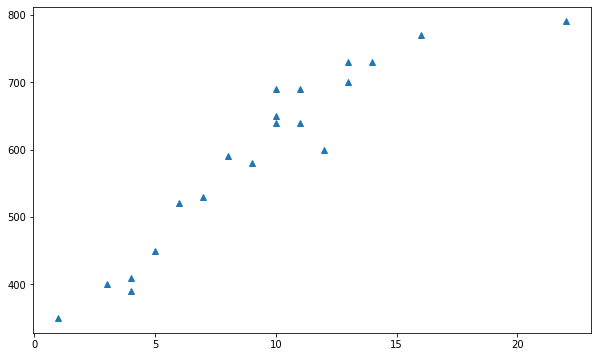

In [22]:
## 이거 의미하는 그래프가 무엇인지 모르겠다ㅠㅠ
plt.plot(x[:,0], y[:,0], '^')   # x[ :,3]
print('x[:,0]:',x[:,0])

In [23]:
x_ =np.linspace(1, 30, 60)
print('x_:',x_)

x_: [ 1.      1.4915  1.9831  2.4746  2.9661  3.4576  3.9492  4.4407  4.9322
  5.4237  5.9153  6.4068  6.8983  7.3898  7.8814  8.3729  8.8644  9.3559
  9.8475 10.339  10.8305 11.322  11.8136 12.3051 12.7966 13.2881 13.7797
 14.2712 14.7627 15.2542 15.7458 16.2373 16.7288 17.2203 17.7119 18.2034
 18.6949 19.1864 19.678  20.1695 20.661  21.1525 21.6441 22.1356 22.6271
 23.1186 23.6102 24.1017 24.5932 25.0847 25.5763 26.0678 26.5593 27.0508
 27.5424 28.0339 28.5254 29.0169 29.5085 30.    ]


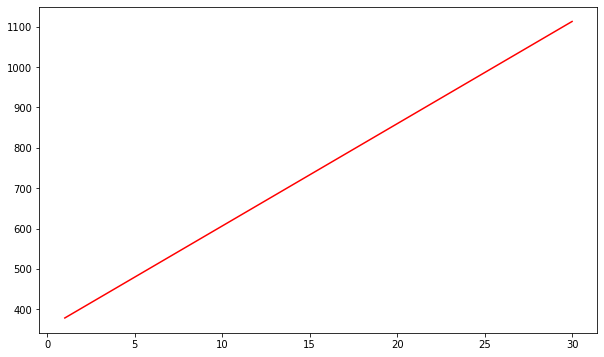

In [24]:
h = x_*w + b
plt.plot(x_, h, 'r')

# 주가 문제 풀이

In [25]:

Interest_Rate =  np.array([[2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,
                            2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,
                            1.75,1.75,1.75,1.75,1.75,1.75,1.75]]).T

Unemployment_Rate = np.array([[5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                               5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,
                               6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1]]).T

Stock_Index_Price =  [1464,1394,1357,1293,1256,1254,1234,1195,
                      1159,1167,1130,1075,1047,965,943,958,971,
                      949,884,866,876,822,704,719]

I = Interest_Rate
U = Unemployment_Rate
S = Stock_Index_Price

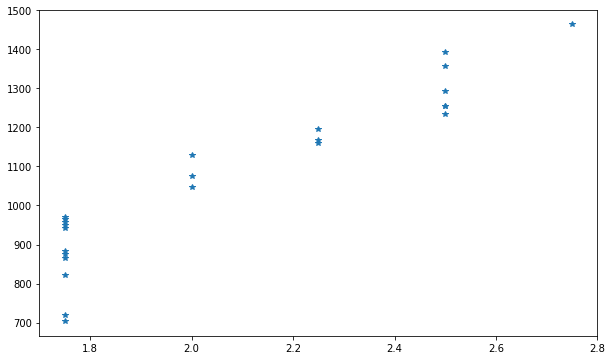

In [26]:
plt.plot(Interest_Rate[:,0], Stock_Index_Price, '*')
# 이자율을 기반으로 해서 주식값을 출력해보았다.
# 이자율과 주가지수은 비례관계라는 것을 알 수 있다.

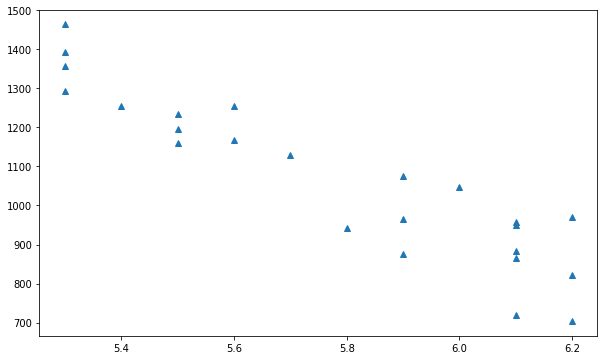

In [27]:
plt.plot(Unemployment_Rate[:,0], Stock_Index_Price, '^')
#실업율과 주가지수는 반비례 관계이다.

## 문제 1 : 이자율 = 5.1  / 실업률 = 6.2  이면 주가지수는?

## 선생님 버전으로 풀기

In [28]:
A = np.append(I,U, axis = 1) # 이자율과 실업률을 옆으로 붙인다
A

array([[2.75, 5.3 ],
       [2.5 , 5.3 ],
       [2.5 , 5.3 ],
       [2.5 , 5.3 ],
       [2.5 , 5.4 ],
       [2.5 , 5.6 ],
       [2.5 , 5.5 ],
       [2.25, 5.5 ],
       [2.25, 5.5 ],
       [2.25, 5.6 ],
       [2.  , 5.7 ],
       [2.  , 5.9 ],
       [2.  , 6.  ],
       [1.75, 5.9 ],
       [1.75, 5.8 ],
       [1.75, 6.1 ],
       [1.75, 6.2 ],
       [1.75, 6.1 ],
       [1.75, 6.1 ],
       [1.75, 6.1 ],
       [1.75, 5.9 ],
       [1.75, 6.2 ],
       [1.75, 6.2 ],
       [1.75, 6.1 ]])

In [29]:
A = np.append(A, np.ones((A.shape[0],1)),axis=1)
A

array([[2.75, 5.3 , 1.  ],
       [2.5 , 5.3 , 1.  ],
       [2.5 , 5.3 , 1.  ],
       [2.5 , 5.3 , 1.  ],
       [2.5 , 5.4 , 1.  ],
       [2.5 , 5.6 , 1.  ],
       [2.5 , 5.5 , 1.  ],
       [2.25, 5.5 , 1.  ],
       [2.25, 5.5 , 1.  ],
       [2.25, 5.6 , 1.  ],
       [2.  , 5.7 , 1.  ],
       [2.  , 5.9 , 1.  ],
       [2.  , 6.  , 1.  ],
       [1.75, 5.9 , 1.  ],
       [1.75, 5.8 , 1.  ],
       [1.75, 6.1 , 1.  ],
       [1.75, 6.2 , 1.  ],
       [1.75, 6.1 , 1.  ],
       [1.75, 6.1 , 1.  ],
       [1.75, 6.1 , 1.  ],
       [1.75, 5.9 , 1.  ],
       [1.75, 6.2 , 1.  ],
       [1.75, 6.2 , 1.  ],
       [1.75, 6.1 , 1.  ]])

In [30]:
W = np.matmul(lin.pinv(A),S)     # w1x1 + w2x2 + b
print(W)

[ 345.5401 -250.1466 1798.404 ]


In [31]:
# 구해진 최적의 값들
w1 = 345.5401
w2 = -250.1466
b = 1798.404

interest_rate = 5.1   # x1
unemployment_rate = 6.2 # x2


# 주가 예상 값 구하기
Stock_Pridict = interest_rate * w1 + unemployment_rate * w2 + b

Stock_Pridict

2009.7495899999997

## 배운대로, 정석대로 풀기

In [32]:
Interest_Rate =  np.array([[2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,
                            2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,
                            1.75,1.75,1.75,1.75,1.75,1.75,1.75]]).T

Unemployment_Rate = np.array([[5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                               5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,
                               6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1]]).T

Stock_Index_Price =  [1464,1394,1357,1293,1256,1254,1234,1195,
                      1159,1167,1130,1075,1047,965,943,958,971,
                      949,884,866,876,822,704,719]

I = Interest_Rate
U = Unemployment_Rate
S = Stock_Index_Price

In [33]:
A = np.append(I,U, axis = 1)

In [34]:
A = np.append(A, np.ones((A.shape[0],1)), axis = 1)

In [35]:
W = np.matmul(lin.pinv(A),S)
print('W:',W)

h = np.matmul(A,W) # 예측된 값...
print('h:',h)

RSME=np.sqrt(np.mean((S-h)**2))

print("RSME:",RSME)

W: [ 345.5401 -250.1466 1798.404 ]
h: [1422.8624 1336.4774 1336.4774 1336.4774 1311.4627 1261.4334 1286.4481
 1200.063  1200.063  1175.0484 1063.6487 1013.6194  988.6047  927.2344
  952.249   877.205   852.1904  877.205   877.205   877.205   927.2344
  852.1904  852.1904  877.205 ]
RSME: 66.00463133086289


In [36]:
# 최적의 값 : w1, w2, b
w1 = 345.5401
w2 = -250.1466
b = 1798.404

interest_rate = 5.1   # x1
unemployment_rate = 6.2 # x2

y=(w1*interest_rate) + (w2*unemployment_rate) + b # 실제데이터... 와 같이 엄청~~ 정확한 예측값이라 할 수 있겠다.
print(y)

2009.7495899999997


# 또 다른 예측을 계속 해보자!

In [37]:
x_data = np.array([
    [5.1,6.2,1],
    [5.1,6.1,1],
    [5.1,6.2,1],
    [5.2,6.2,1],
    [2.75,5.3,1],
    [2.5,5.3,1]])

result = np.matmul(x_data,W)
print(result)

[2009.7497 2034.7643 2009.7497 2044.3037 1422.8624 1336.4774]


In [38]:
from mpl_toolkits import mplot3d
%matplotlib qt5   

In [39]:
fig = plt.figure()
ax = plt.axes(projection = "3d")

ax.scatter3D(Interest_Rate[:,0], Unemployment_Rate[:,0], Stock_Index_Price)

## 여기서부터 : 7월 7일 수업 start!

In [51]:
xx, yy = np.mgrid[0.5:3:0.1, 5:7:0.1]
#xx, yy = np.mgrid[0.5:3:0.05, 5:7:0.05]# 여기서 0.05는 주황색을 빼곡빼곡할지..아니면 넓게넓게할지 결정해주는것. 숫자가 클수록 넓게넓게
grid = np.c_[xx.flatten(), yy.flatten()]
# 학습결과를 확인할 수 있는 방법입니다~!!


x_ = np.append(grid, np.ones((grid.shape[0] , 1)) , axis = 1)
print(x_)
result = np.matmul(x_, W)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(Interest_Rate[:,0],Unemployment_Rate[:,0], Stock_Index_Price, 'b') # 원본 데이터를 그림 ( 파란 점들...)
ax.scatter3D(xx.flatten(), yy.flatten(), result, 'r') # 학습된 데이터를 그림 => 빨간색의 평면 데이터... (주황색같은데..r이래 ㅋㅋ..)

[[0.5 5.  1. ]
 [0.5 5.1 1. ]
 [0.5 5.2 1. ]
 ...
 [2.9 6.7 1. ]
 [2.9 6.8 1. ]
 [2.9 6.9 1. ]]


In [48]:
xx, yy = np.mgrid[1:3:0.5, -4:-2:0.5] # 0.5 간격으로 x(이자율)가 변합니다.   / 0.5간격으로 y(실업률)가 변합니다
print(xx)
print(yy)

[[1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5]
 [2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5]]
[[-4.  -3.5 -3.  -2.5]
 [-4.  -3.5 -3.  -2.5]
 [-4.  -3.5 -3.  -2.5]
 [-4.  -3.5 -3.  -2.5]]


In [52]:
grid = np.c_[xx.flatten(),yy.flatten()] # c는 콘켄트레이트로 xx.flatten(),yy.flatten() 둘을 짝꿍해서 만들어 준다.
print(grid)

[[0.5 5. ]
 [0.5 5.1]
 [0.5 5.2]
 [0.5 5.3]
 [0.5 5.4]
 [0.5 5.5]
 [0.5 5.6]
 [0.5 5.7]
 [0.5 5.8]
 [0.5 5.9]
 [0.5 6. ]
 [0.5 6.1]
 [0.5 6.2]
 [0.5 6.3]
 [0.5 6.4]
 [0.5 6.5]
 [0.5 6.6]
 [0.5 6.7]
 [0.5 6.8]
 [0.5 6.9]
 [0.6 5. ]
 [0.6 5.1]
 [0.6 5.2]
 [0.6 5.3]
 [0.6 5.4]
 [0.6 5.5]
 [0.6 5.6]
 [0.6 5.7]
 [0.6 5.8]
 [0.6 5.9]
 [0.6 6. ]
 [0.6 6.1]
 [0.6 6.2]
 [0.6 6.3]
 [0.6 6.4]
 [0.6 6.5]
 [0.6 6.6]
 [0.6 6.7]
 [0.6 6.8]
 [0.6 6.9]
 [0.7 5. ]
 [0.7 5.1]
 [0.7 5.2]
 [0.7 5.3]
 [0.7 5.4]
 [0.7 5.5]
 [0.7 5.6]
 [0.7 5.7]
 [0.7 5.8]
 [0.7 5.9]
 [0.7 6. ]
 [0.7 6.1]
 [0.7 6.2]
 [0.7 6.3]
 [0.7 6.4]
 [0.7 6.5]
 [0.7 6.6]
 [0.7 6.7]
 [0.7 6.8]
 [0.7 6.9]
 [0.8 5. ]
 [0.8 5.1]
 [0.8 5.2]
 [0.8 5.3]
 [0.8 5.4]
 [0.8 5.5]
 [0.8 5.6]
 [0.8 5.7]
 [0.8 5.8]
 [0.8 5.9]
 [0.8 6. ]
 [0.8 6.1]
 [0.8 6.2]
 [0.8 6.3]
 [0.8 6.4]
 [0.8 6.5]
 [0.8 6.6]
 [0.8 6.7]
 [0.8 6.8]
 [0.8 6.9]
 [0.9 5. ]
 [0.9 5.1]
 [0.9 5.2]
 [0.9 5.3]
 [0.9 5.4]
 [0.9 5.5]
 [0.9 5.6]
 [0.9 5.7]
 [0.9 5.8]
 [0.9 5.9]
 [0.9 6. ]